In [2]:
import pandas as pd
import os

# Define the file path
file_path = r"C:\Users\anvim\Desktop\PYTHON ASS\machine learning\CarPrice_Assignment.csv"

# Check if the file exists
if os.path.exists(file_path):
    # Load the dataset
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
    
    # Display basic information about the dataset
    print("Dataset Info:")
    print(df.info())
    
    # Display the first few rows
    print("\nFirst few rows:")
    print(df.head())
    
    # Handle missing values (example: filling or dropping)
    if df.isnull().values.any():
        print("\nMissing values detected. Filling with mean values.")
        df.fillna(df.mean(), inplace=True)
    
    # Check for duplicates and remove if any
    if df.duplicated().any():
        print("\nDuplicates detected. Removing duplicates.")
        df.drop_duplicates(inplace=True)
    
    # Normalize numerical columns (if needed)
    from sklearn.preprocessing import StandardScaler
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    scaler = StandardScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    
    print("\nPreprocessing completed. Here's a snapshot of the cleaned dataset:")
    print(df.head())
else:
    print("File not found. Please check the file path.")


Dataset loaded successfully!
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  e

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
# Assume `df` is already loaded with your dataset

# Convert categorical columns to numeric
categorical_columns = ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 
                       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Set the target variable
target_column = 'price'

# Ensure the target column exists
if target_column not in df_encoded.columns:
    raise ValueError(f"Target column '{target_column}' not found in the dataset.")

# Split features and target
X = df_encoded.drop(columns=[target_column])
y = df_encoded[target_column]

# Train-test split (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR(kernel='rbf')
}

# Train, predict, and evaluate each model
results = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on the test set
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {"Mean Squared Error": mse, "R2 Score": r2}
    print(f"{model_name}: MSE = {mse:.4f}, R2 Score = {r2:.4f}")

# Display summary of results
print("\nModel Performance Summary:")
for model_name, metrics in results.items():
    print(f"{model_name}:\n  MSE: {metrics['Mean Squared Error']:.4f}\n  R2 Score: {metrics['R2 Score']:.4f}\n")

Training Linear Regression...
Linear Regression: MSE = 2.7832, R2 Score = -1.2391
Training Decision Tree Regressor...
Decision Tree Regressor: MSE = 0.1662, R2 Score = 0.8663
Training Random Forest Regressor...
Random Forest Regressor: MSE = 0.0574, R2 Score = 0.9539
Training Gradient Boosting Regressor...
Gradient Boosting Regressor: MSE = 0.0841, R2 Score = 0.9323
Training Support Vector Regressor...
Support Vector Regressor: MSE = 0.1543, R2 Score = 0.8758

Model Performance Summary:
Linear Regression:
  MSE: 2.7832
  R2 Score: -1.2391

Decision Tree Regressor:
  MSE: 0.1662
  R2 Score: 0.8663

Random Forest Regressor:
  MSE: 0.0574
  R2 Score: 0.9539

Gradient Boosting Regressor:
  MSE: 0.0841
  R2 Score: 0.9323

Support Vector Regressor:
  MSE: 0.1543
  R2 Score: 0.8758



In [11]:
from sklearn.metrics import mean_absolute_error

# Train, predict, and evaluate each model
results = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on the test set
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {"MSE": mse, "MAE": mae, "R2": r2}
    print(f"{model_name}:\n  MSE = {mse:.4f}\n  MAE = {mae:.4f}\n  R2 Score = {r2:.4f}\n")

# Display summary of results
print("\nModel Performance Summary:")
for model_name, metrics in results.items():
    print(f"{model_name}:\n  MSE: {metrics['MSE']:.4f}\n  MAE: {metrics['MAE']:.4f}\n  R2 Score: {metrics['R2']:.4f}\n")

# Identify the best-performing model
best_model = max(results, key=lambda k: results[k]['R2'])  # Based on highest R2 score
print(f"The best-performing model is {best_model} with R2 = {results[best_model]['R2']:.4f}")


Training Linear Regression...
Linear Regression:
  MSE = 2.7832
  MAE = 0.9136
  R2 Score = -1.2391

Training Decision Tree Regressor...
Decision Tree Regressor:
  MSE = 0.1662
  MAE = 0.2629
  R2 Score = 0.8663

Training Random Forest Regressor...
Random Forest Regressor:
  MSE = 0.0574
  MAE = 0.1717
  R2 Score = 0.9539

Training Gradient Boosting Regressor...
Gradient Boosting Regressor:
  MSE = 0.0841
  MAE = 0.2070
  R2 Score = 0.9323

Training Support Vector Regressor...
Support Vector Regressor:
  MSE = 0.1543
  MAE = 0.2648
  R2 Score = 0.8758


Model Performance Summary:
Linear Regression:
  MSE: 2.7832
  MAE: 0.9136
  R2 Score: -1.2391

Decision Tree Regressor:
  MSE: 0.1662
  MAE: 0.2629
  R2 Score: 0.8663

Random Forest Regressor:
  MSE: 0.0574
  MAE: 0.1717
  R2 Score: 0.9539

Gradient Boosting Regressor:
  MSE: 0.0841
  MAE: 0.2070
  R2 Score: 0.9323

Support Vector Regressor:
  MSE: 0.1543
  MAE: 0.2648
  R2 Score: 0.8758

The best-performing model is Random Forest Regre

Top 10 Important Features:
enginesize          0.650851
curbweight          0.192022
highwaympg          0.056202
car_ID              0.018377
horsepower          0.017270
carwidth            0.009972
carlength           0.006427
compressionratio    0.006335
citympg             0.005383
wheelbase           0.005347
dtype: float64


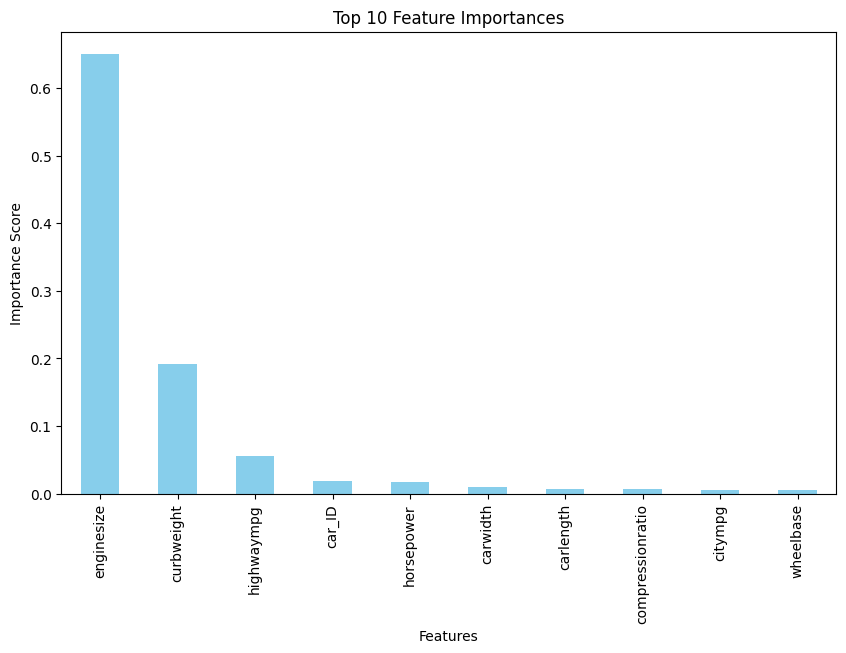

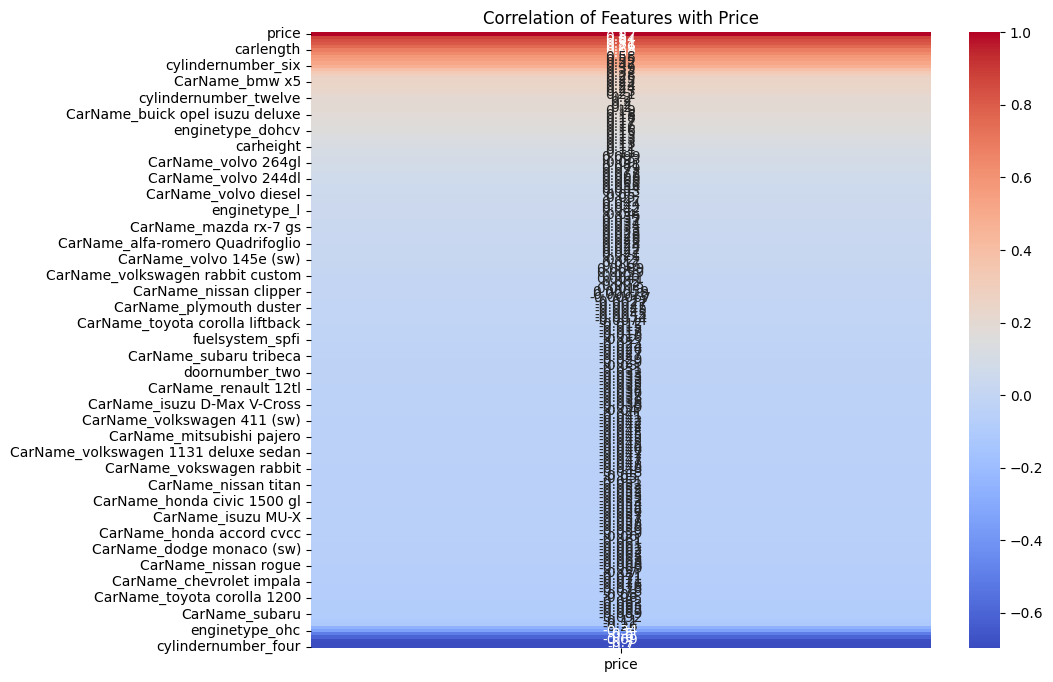

In [12]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Train a Random Forest Regressor to get feature importances
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Display top 10 important features
print("Top 10 Important Features:")
print(feature_importances.head(10))

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importances.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Feature Importances')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.show()

# Correlation analysis
correlation = df_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation[['price']].sort_values(by='price', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation of Features with Price")
plt.show()


In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# Define parameter grids for each model
param_grids = {
    "Linear Regression": {},  # No hyperparameters to tune for basic Linear Regression
    "Decision Tree Regressor": {
        "max_depth": [3, 5, 10, None],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
    },
    "Random Forest Regressor": {
        "n_estimators": [100, 200, 300],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
    },
    "Gradient Boosting Regressor": {
        "n_estimators": [100, 200, 300],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 10],
    },
    "Support Vector Regressor": {
        "C": [0.1, 1, 10],
        "epsilon": [0.1, 0.2, 0.5],
        "kernel": ["linear", "rbf"],
    }
}

# Store tuned models and results
tuned_results = {}
best_models = {}

# Perform hyperparameter tuning
for model_name, param_grid in param_grids.items():
    print(f"Tuning {model_name}...")
    model = models[model_name]  # Use the original models dictionary
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring="r2", n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    
    # Get the best model and results
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    y_pred = best_model.predict(X_test)
    
    # Evaluate tuned model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    tuned_results[model_name] = {"MSE": mse, "MAE": mae, "R2": r2, "Best Params": best_params}
    best_models[model_name] = best_model
    
    print(f"{model_name} (Tuned):\n  MSE = {mse:.4f}\n  MAE = {mae:.4f}\n  R2 Score = {r2:.4f}\n  Best Params = {best_params}\n")

# Compare results before and after tuning
print("\nTuned Model Performance Summary:")
for model_name, metrics in tuned_results.items():
    print(f"{model_name}:\n  MSE: {metrics['MSE']:.4f}\n  MAE: {metrics['MAE']:.4f}\n  R2 Score: {metrics['R2']:.4f}\n  Best Params: {metrics['Best Params']}\n")

Tuning Linear Regression...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Linear Regression (Tuned):
  MSE = 2.7832
  MAE = 0.9136
  R2 Score = -1.2391
  Best Params = {}

Tuning Decision Tree Regressor...
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Decision Tree Regressor (Tuned):
  MSE = 0.1544
  MAE = 0.2524
  R2 Score = 0.8757
  Best Params = {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}

Tuning Random Forest Regressor...
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Random Forest Regressor (Tuned):
  MSE = 0.0717
  MAE = 0.1864
  R2 Score = 0.9423
  Best Params = {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}

Tuning Gradient Boosting Regressor...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Gradient Boosting Regressor (Tuned):
  MSE = 0.0841
  MAE = 0.2070
  R2 Score = 0.9323
  Best Params = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

Tuni